In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.linalg import toeplitz
from scipy.special import factorial
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

### Дано:
$$ f(x) = \exp{\left( -\frac{(x - 1)^2}{0.2^2} \right)}; $$
$$ 
    \Delta_{\max} = 8, \quad E_0 = 40, \quad
    \tau_1 = 0.5, \quad \tau_2 = 1.5
$$

In [2]:
func = lambda arg: np.exp(-(arg - 1)**2 / 0.2**2)
E0         = 40
Delta_max  = 8
tau_1      = 0.5
tau_2      = 1.5

### Решение:

$$
    y_1(\Delta) = f(\Delta)\left( \int^{E_0}_{0} f(\varepsilon) d\varepsilon \right)^{-1}
$$

Для вычисления определенного интегрлала $\int^{E_0}_{0} f(\varepsilon) d\varepsilon$ воспользуемся функцией ```scipy.quad```.

In [3]:
def y1(delta: float) -> float:
    return func(delta) / quad(func, 0, E0)[0]

$$
    y_n(\Delta) = \int^{\Delta}_{0} y_{n-1}(\Delta - \varepsilon) y_1(\varepsilon) d\varepsilon.
$$

Воспользовавшись свойством свертки, перейдем к следующему интегралу
$$
    y_n(\Delta) = \int^{\Delta}_{0} y_{1}(\Delta - \varepsilon) y_{n-1}(\varepsilon) d\varepsilon.
$$

Введя равномерную сетку $\Delta_i = hi, i = 0\cdots(N-1)$ и воспользовавшись формулой левостронних прямоугольников, найдем значение интеграла как
$$
    Y_n = AY_{n-1} = AAY_{n-2} = \cdots = A^{n-1}Y_1,
$$

$$
    Y_n = \begin{pmatrix}
        y_{1, 0} & 0 & 0 & 0 & 0\\
        y_{1, 1} & y_{1, 0} & 0 & 0 & 0\\
        y_{1, 2} & y_{1, 1} & y_{1, 0} & \cdots & 0\\
        \cdots & \cdots & \cdots & \cdots & 0 \\
        y_{1, N - 1} & y_{1, N - 2} & \cdots & y_{1, 1} & y_{1, 0}
    \end{pmatrix}^{n-1} h \cdot \begin{pmatrix}
        y_{1, 0} \\ y_{1, 1} \\ \cdots \\ y_{1, N-2} \\ y_{1, N-1} 
    \end{pmatrix}
$$

Таким образом, решением будет являтся последний элемент матрицы $Y_n$ (для создания которой воспользуемся функцией ```scipy.toepliz```).

In [ ]:
def Yn(n: int, space: np.array) -> np.array:
    A = toeplitz(y1(space), np.concatenate((np.array([y1(0)]), np.zeros(space.size - 1))))
    for i in range(n - 1):
        A = A @ A
    return A @ y1(space)

$$
    T(\tau, \Delta) = e^{-\tau} \sum^{N}_{n = 1}y_n(\Delta) \frac{t^n}{n!}
$$

In [5]:
def T(tau: float, N: int, space: np.array) -> float:
    return np.exp(-tau) * np.sum([Yn(n, space) * tau**n / factorial(n) for n in range(1, N + 1)], axis = 0)

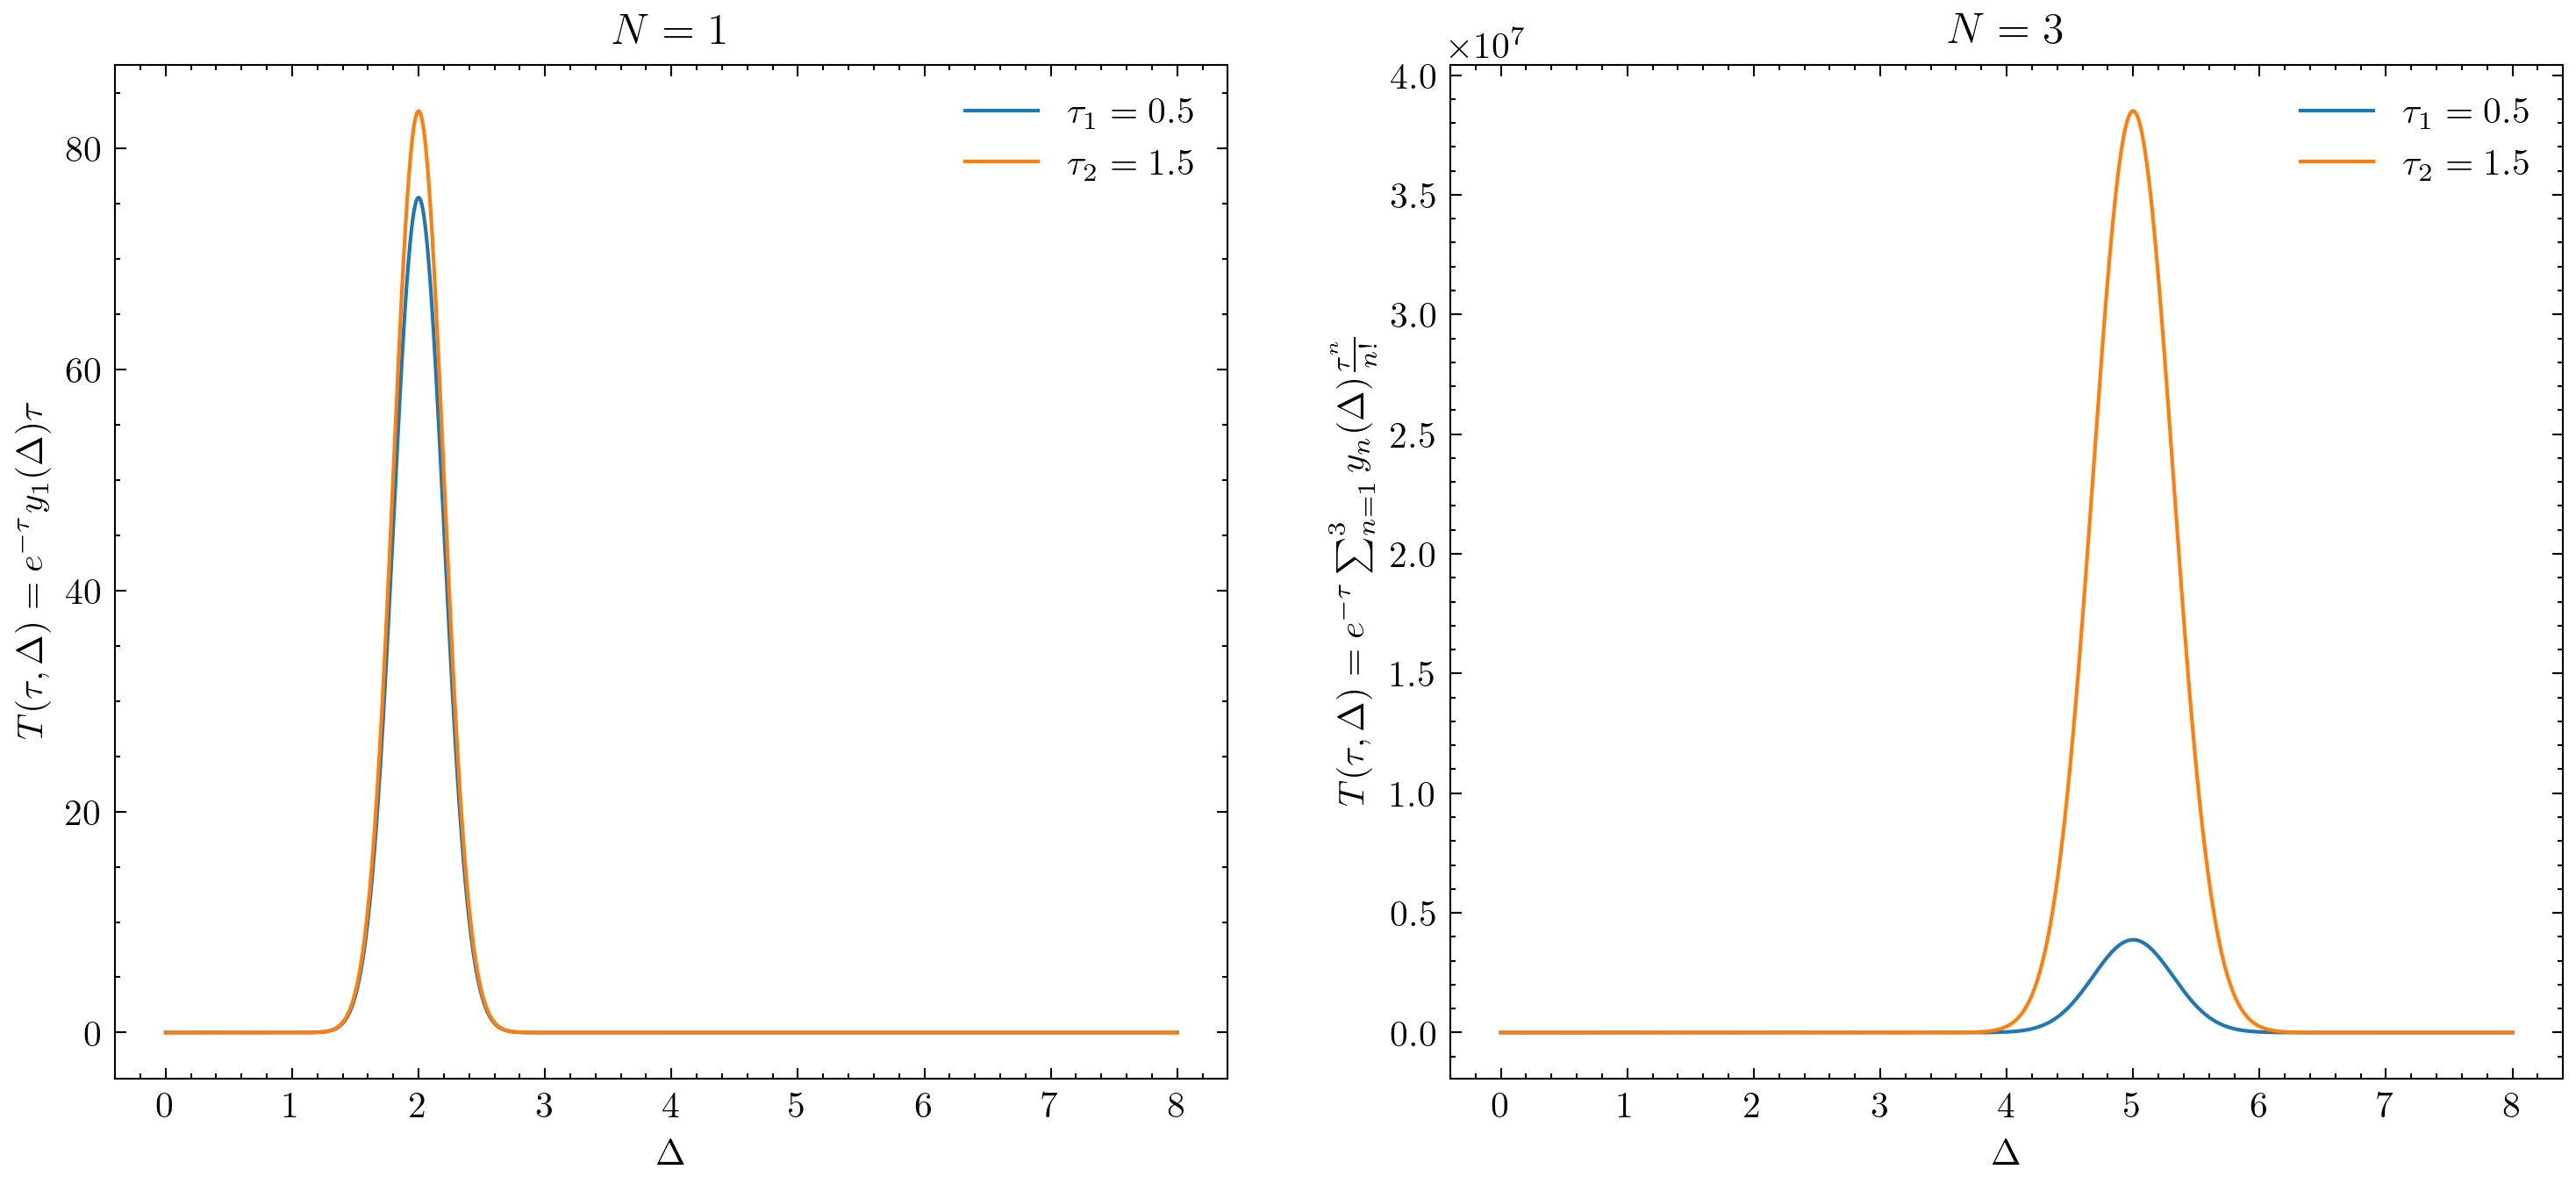

In [6]:
x = np.linspace(0, Delta_max, 1000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5), dpi = 300)

ax2.set_title(r"$N = 3$")
ax2.set_ylabel(r"$T(\tau, \Delta) = e^{-\tau} \sum^{3}_{n = 1}y_n(\Delta) \frac{\tau^n}{n!}$")
ax2.set_xlabel(r"$\Delta$")
ax2.plot(x, T(tau_1, 3, x), label = f"$\\tau_1 = {tau_1:.1f}$", color = "tab:blue")
ax2.plot(x, T(tau_2, 3, x), label = f"$\\tau_2 = {tau_2:.1f}$", color = "tab:orange")
ax2.legend()

ax1.set_title(r"$N = 1$")
ax1.set_ylabel(r"$T(\tau, \Delta) = e^{-\tau} y_1(\Delta)\tau$")
ax1.set_xlabel(r"$\Delta$")
ax1.plot(x, T(tau_1, 1, x), label = f"$\\tau_1 = {tau_1:.1f}$", color = "tab:blue")
ax1.plot(x, T(tau_2, 1, x), label = f"$\\tau_2 = {tau_2:.1f}$", color = "tab:orange")
ax1.legend()

plt.show()